In [22]:
import numpy as np
import matplotlib.pyplot as plt

after regression data generation, make sure u saperate it to two parts. one is the train part, another one is the valid part. 

In [83]:
np.random.seed(42)
x = np.random.rand(100)
y = 1 + 2*x + 0.1*np.random.randn(100)

#good way to shuffle but i think is no need 
index = np.arange(100)
np.random.shuffle(index)

train_idx = index[:80]
valid_idx = index[80:]

#saperate to two parts
train_data_x, train_data_y = x[train_idx], y[train_idx]
valid_data_x, valid_data_y = x[valid_idx], y[valid_idx]
train_data_x

array([0.77127035, 0.06355835, 0.86310343, 0.02541913, 0.73199394,
       0.07404465, 0.19871568, 0.31098232, 0.47221493, 0.96958463,
       0.12203823, 0.77513282, 0.80219698, 0.72960618, 0.09767211,
       0.18485446, 0.15601864, 0.02058449, 0.98688694, 0.62329813,
       0.70807258, 0.59789998, 0.92187424, 0.63755747, 0.28093451,
       0.25877998, 0.11959425, 0.72900717, 0.94888554, 0.60754485,
       0.5612772 , 0.4937956 , 0.18182497, 0.27134903, 0.96990985,
       0.21233911, 0.18340451, 0.86617615, 0.37454012, 0.29122914,
       0.80839735, 0.05808361, 0.83244264, 0.54269608, 0.77224477,
       0.88721274, 0.0884925 , 0.04522729, 0.59241457, 0.68423303,
       0.71324479, 0.03438852, 0.60111501, 0.81546143, 0.44015249,
       0.32518332, 0.78517596, 0.76078505, 0.49517691, 0.19967378,
       0.95071431, 0.29214465, 0.13949386, 0.31171108, 0.70685734,
       0.11586906, 0.35846573, 0.00552212, 0.19598286, 0.89482735,
       0.45606998, 0.52475643, 0.14092422, 0.06505159, 0.17052

visualize your data 

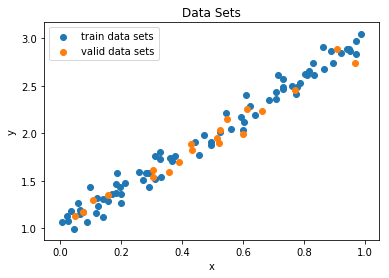

In [39]:
plt.scatter(train_data_x, train_data_y)
plt.scatter(valid_data_x, valid_data_y)
plt.title('Data Sets')
plt.legend(['train data sets', 'valid data sets'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

start training by using numpy to show how complicated it is in this simple regression problem 

In [96]:
# initialize the parameters
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)
# define the lr and epochs
lr = 0.1
epochs = 1000
print(a, b)

[0.49671415] [-0.1382643]


In [97]:
# start training using backprob alogorithm
for epoch in range(epochs):
    yhat = a + b*train_data_x
    error = train_data_y - yhat
    MSE = (error**2).mean()
    # compute the parameter a and b contrubute to the MSE loss by computing the gradient 
    a_grad = (-2*error).mean()
    b_grad = (-2*error*train_data_x).mean()
    # back prob to reduce the MSE loss 
    a = a - lr*a_grad
    b = b - lr*b_grad
    
    if (abs(lr*a_grad) < 0.001) & (abs(lr*b_grad) < 0.001):
        print('epoch: ', epoch)
        break
else:
    print('finish all epochs, not the local minimum')
print("actual parameters: (1, 2)")
print("afeter training: (", a, ",", b, ")")
print("a_grad: ", a_grad)
print("b_grad: ", b_grad)

epoch:  204
actual parameters: (1, 2)
afeter training: ( [1.05640988] , [1.90464916] )
a_grad:  0.005041721852429815
b_grad:  -0.009865183041256966


time to use torch 

In [91]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
from torch.autograd import Variable

In [92]:
tensor_x = torch.FloatTensor(train_data_x)
tensor_y = torch.FloatTensor(train_data_y)
tensor_x

tensor([0.7713, 0.0636, 0.8631, 0.0254, 0.7320, 0.0740, 0.1987, 0.3110, 0.4722,
        0.9696, 0.1220, 0.7751, 0.8022, 0.7296, 0.0977, 0.1849, 0.1560, 0.0206,
        0.9869, 0.6233, 0.7081, 0.5979, 0.9219, 0.6376, 0.2809, 0.2588, 0.1196,
        0.7290, 0.9489, 0.6075, 0.5613, 0.4938, 0.1818, 0.2713, 0.9699, 0.2123,
        0.1834, 0.8662, 0.3745, 0.2912, 0.8084, 0.0581, 0.8324, 0.5427, 0.7722,
        0.8872, 0.0885, 0.0452, 0.5924, 0.6842, 0.7132, 0.0344, 0.6011, 0.8155,
        0.4402, 0.3252, 0.7852, 0.7608, 0.4952, 0.1997, 0.9507, 0.2921, 0.1395,
        0.3117, 0.7069, 0.1159, 0.3585, 0.0055, 0.1960, 0.8948, 0.4561, 0.5248,
        0.1409, 0.0651, 0.1705, 0.8287, 0.3253, 0.9395, 0.3309, 0.3664])

In [101]:
# initilalize the parameters
torch.manual_seed(42)
a = Variable(torch.randn(1), requires_grad = True)
b = Variable(torch.randn(1), requires_grad = True)

lr = 0.1
epochs = 1000
opt = optim.SGD([a,b], lr=lr)
loss_fcn = nn.MSELoss(reduction='mean')

In [106]:
for epoch in range(epochs):
    yhat = a + b*tensor_x
    
    loss = loss_fcn(tensor_y, yhat)
    
    if (epoch==0):
        make_dot(loss)
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    opt.zero_grad() 
    
    loss.backward()
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    opt.step()
print("actual parameters: (1, 2)")
print("afeter training: (", a, ",", b, ")")
print("a_grad: ", a.grad)
print("b_grad: ", b.grad)

actual parameters: (1, 2)
afeter training: ( tensor([1.0235], requires_grad=True) , tensor([1.9690], requires_grad=True) )
a_grad:  tensor([5.4640e-07])
b_grad:  tensor([-5.7230e-07])
